## Importing Necessary Libraries
---



---



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from joblib import dump

## Load preprocessed data
---



---


In [2]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")
X = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X.pkl")
y = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y.pkl")    

## Adjusting the class labels to start from 0
---



---



In [3]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

## Initialize Logistic Regression pipeline
---



---



In [4]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

## Train the model
---



---



In [5]:
pipe.fit(X_train, y_train_adjusted)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

## Predictions 
---



---



In [6]:
y_pred_train_logistic = pipe.predict(X_train)
y_pred_test_logistic = pipe.predict(X_test)

## Metrics calculation
---



---



In [7]:
logistic_accuracy_test = accuracy_score(y_test_adjusted, y_pred_test_logistic) * 100
logistic_accuracy_train = accuracy_score(y_train_adjusted, y_pred_train_logistic) * 100
logistic_f1 = f1_score(y_test_adjusted, y_pred_test_logistic, average='weighted') * 100
logistic_accuracy_overall = (logistic_accuracy_test + logistic_accuracy_train) / 2

# Create a dictionary to store different metrics
metrics_dict_logistic = {
    "Model": ["Logistic Regression"],
    "Train Accuracy": [f"{logistic_accuracy_train:.3f}%"],
    "Test Accuracy": [f"{logistic_accuracy_test:.3f}%"],
    "Overall Accuracy": [f"{logistic_accuracy_overall:.3f}%"],
    "F1-Score": [f"{logistic_f1:.3f}%"],
}

# Convert the dictionary to a DataFrame
metrics_df_logistic = pd.DataFrame(metrics_dict_logistic)

# Define the class names
class_names = ['Normal', 'Suspect', 'Pathologic']

# Save the DataFrame to a CSV file
metrics_df_logistic.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/LOG_REG/log_metrics.csv", index=False)

## Classification report
---



---



In [8]:
report = classification_report(y_test_adjusted, y_pred_test_logistic, output_dict=True, target_names=class_names)
df_report = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))
print("\n")


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Normal       │    0.948171 │ 0.936747 │   0.942424 │ 332        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Suspect      │    0.706897 │ 0.694915 │   0.700855 │  59        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Pathologic   │    0.7      │ 0.8      │   0.746667 │  35        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.892019 │ 0.892019 │   0.892019 │   0.892019 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.785022 │ 0.810554 │   0.796649 │ 426        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.894365 │ 0.892019 │   0.892884 │ 426        │
╘══════════════╧════════

## Confusion matrix
---



---



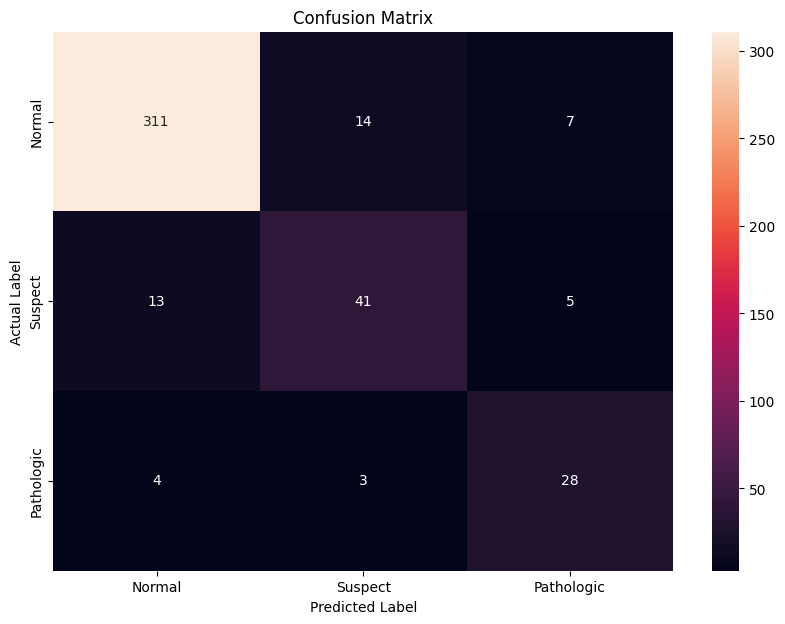

In [9]:
cm = confusion_matrix(y_test_adjusted, y_pred_test_logistic)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Learning Curve
---



---



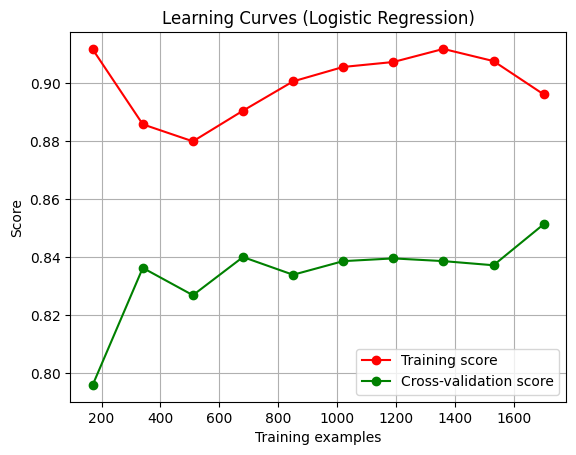

In [10]:
train_sizes, train_scores, valid_scores = learning_curve(pipe, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves (Logistic Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

## Save the trained model to a file
___
___

In [12]:
import pickle

model_filename = '/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_log_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(pipe, model_file)

print(f"Model trained and saved to file: {model_filename}")

Model trained and saved to file: /Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_log_model.pkl
